In [1]:
import pandas as pd
from plotnine import *

%matplotlib inline

c:\Users\Renato\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Renato\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Renato\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [40]:
df_titanic = pd.read_csv("titanic.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,165,0,3,Panula. Master. Eino Viljami,male,1,4,1,3101295,396875,S
1,173,1,3,Johnson. Miss. Eleanor Ileen,female,1,1,1,347742,111333,S
2,184,1,2,Becker. Master. Richard F,male,1,2,1,230136,39,S
3,382,1,3,"Nakid. Miss. Maria (""Mary"")",female,1,0,2,2653,157417,C
4,387,0,3,Goodwin. Master. Sidney Leonard,male,1,5,2,CA 2144,469,S
...,...,...,...,...,...,...,...,...,...,...,...
709,526,0,3,Farrell. Mr. James,male,40,0,0,367232,775,Q
710,204,0,3,Youseff. Mr. Gerious,male,45,0,0,2628,7225,C
711,332,0,1,Partner. Mr. Austen,male,45,0,0,113043,285,S
712,153,0,3,Meo. Mr. Alfonzo,male,55,0,0,A.5. 11206,805,S


In [41]:
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [42]:
df_titanic.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Fare'], axis=1, inplace=True)
df_titanic

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,1,S
1,1,3,female,1,S
2,1,2,male,1,S
3,1,3,female,1,C
4,0,3,male,1,S
...,...,...,...,...,...
709,0,3,male,40,Q
710,0,3,male,45,C
711,0,1,male,45,S
712,0,3,male,55,S


In [71]:
df_titanic['Embarked'] = df_titanic['Embarked'].astype('category')
df_titanic['Survived'] = df_titanic['Survived'].astype('category')
df_titanic['Sex'] = df_titanic['Sex'].astype('category')
df_titanic['Pclass'] = df_titanic['Pclass'].astype('category')
df_titanic.dtypes

Survived    category
Pclass      category
Sex         category
Age            int64
Embarked    category
dtype: object

In [72]:
df_titanic['Age'].describe()

count    714.000000
mean      30.403361
std       14.949463
min        1.000000
25%       21.000000
50%       28.500000
75%       39.000000
max       92.000000
Name: Age, dtype: float64

In [73]:
df_titanic[['Survived']].value_counts()

Survived
0           424
1           290
dtype: int64

In [74]:
df_titanic[['Sex', 'Survived']].value_counts()

Sex     Survived
male    0           360
female  1           197
male    1            93
female  0            64
dtype: int64

In [75]:
df_titanic[['Survived', 'Pclass']].value_counts()

Survived  Pclass
0         3         270
1         1         122
0         2          90
1         3          85
          2          83
0         1          64
dtype: int64

In [76]:
df_titanic.groupby(['Survived', 'Embarked', 'Sex', 'Pclass']).count()

Age
Survived Embarked Sex    Pclass     
0        C        female 1         1
                         2         0
                         3         5
                  male   1        20
                         2         7
                         3        18
         Q        female 1         0
                         2         0
                         3         5
                  male   1         1
                         2         1
                         3        13
         S        female 1         2
                         2         6
                         3        45
                  male   1        40
                         2        76
                         3       184
1        C        female 1        39
                         2         7
                         3        11
                  male   1        16
                         2         1
                         3         7
         Q        female 1         1
                         2         1
                         3         5
                  male   1         0
                         2         0
                         3         1
         S        female 1        42
                         2        60
                         3        31
                  male   1        24
                         2        14
                         3        30

c:\Users\Renato\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 23'. Pick better value with 'binwidth'.


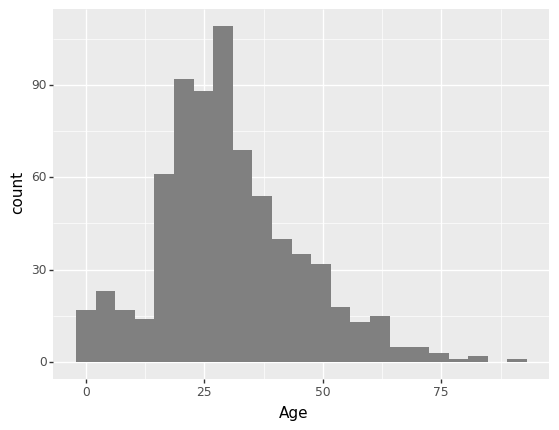

<ggplot: (122875652581)>

In [96]:
(ggplot(df_titanic, aes(x='Age'))+
    geom_histogram(fill='gray'))

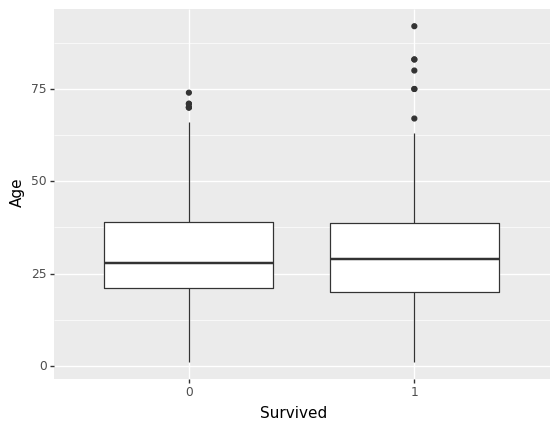

<ggplot: (122875826353)>

In [103]:
(ggplot(df_titanic, aes(x='Survived', y='Age'))+
    geom_boxplot())

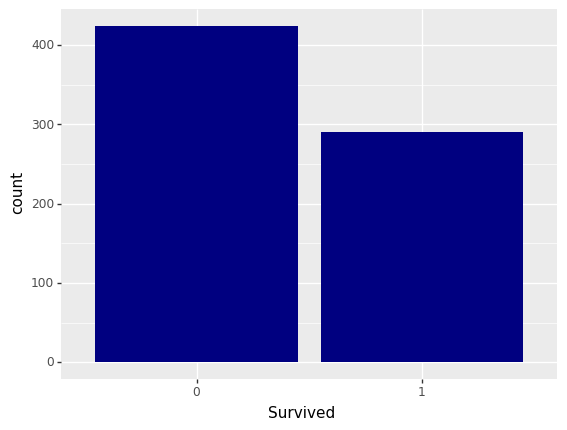

<ggplot: (122874607921)>

In [83]:
(ggplot(df_titanic, aes(x='Survived'))+
    geom_bar(fill='navy'))

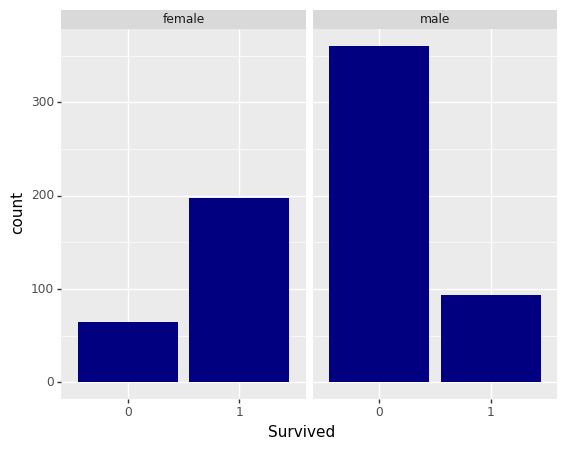

<ggplot: (122874531745)>

In [86]:
(ggplot(df_titanic, aes(x='Survived'))+
    geom_bar(fill='navy')+
    facet_grid('~Sex'))

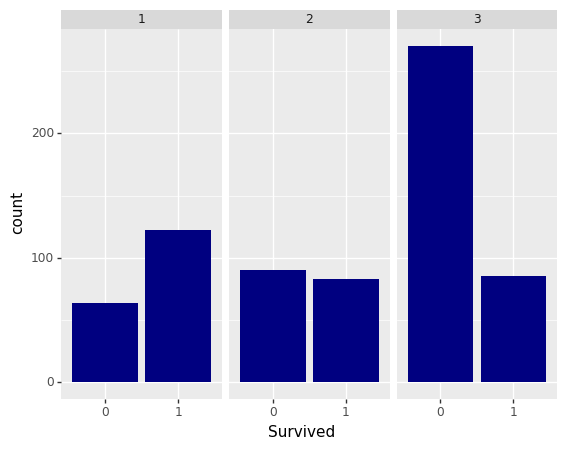

<ggplot: (122869649721)>

In [87]:
(ggplot(df_titanic, aes(x='Survived'))+
    geom_bar(fill='navy')+
    facet_grid('~Pclass'))

In [121]:
import matplotlib.pyplot as plt
import numpy as np

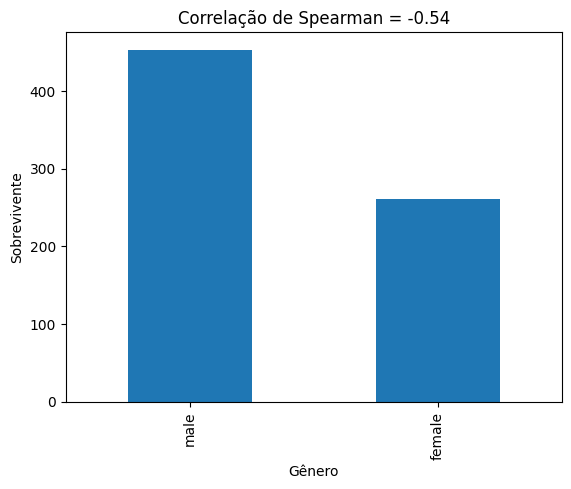

In [128]:
# Calcula a correlação de Pearson entre as colunas 'x' e 'y'
corr = df_titanic['Sex'].corr(df_titanic['Survived'], method='spearman')

# Cria um gráfico de dispersão
df_titanic['Sex'].value_counts().plot(kind='bar')

# Define o título do gráfico e os rótulos dos eixos
plt.title(f'Correlação de Spearman = {corr:.2f}')
plt.xlabel('Gênero')
plt.ylabel('Sobrevivente')

# Exibe o gráfico na tela
plt.show()

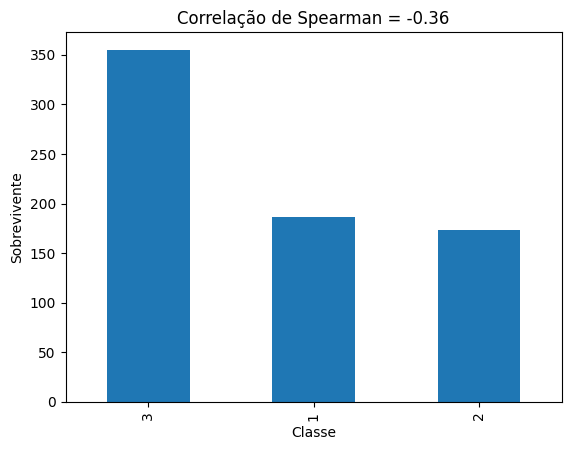

In [130]:
# Calcula a correlação de Pearson entre as colunas 'x' e 'y'
corr = df_titanic['Survived'].corr(df_titanic['Pclass'], method='spearman')

# Cria um gráfico de dispersão
df_titanic['Pclass'].value_counts().plot(kind='bar')

# Define o título do gráfico e os rótulos dos eixos
plt.title(f'Correlação de Spearman = {corr:.2f}')
plt.xlabel('Classe')
plt.ylabel('Sobrevivente')

# Exibe o gráfico na tela
plt.show()